# ESG News Data Exploration and Summary

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objective

This notebook aims to perform an initial exploratory analysis of the ESG news dataset.
We focus on understanding the distribution of news articles across companies, ESG categories, and sentiment labels.

In [ ]:
news_press = pd.read_csv('/content/drive/MyDrive/MIAX/TRABAJO FINAL DE MASTER DEFINITIVO/NEWS_+_PRESS_ESG.csv')
esg_scores = pd.read_csv('/content/drive/MyDrive/MIAX/TFM/AAA RED NEURONAL/ESG_SCORES.csv')

In [ ]:
news_press = news_press.rename(columns={'sentimiento_predicho': 'sentiment'})
news_press

,Publication Date,title,content,sector,url,ticker,text,category,sentiment,source,reputation_score
0,2020-03-26,Factbox: Coronavirus cases reported at 13 of A...,Amazon.com Inc is at the front line of respon...,Technology,https://www.reuters.com/article/us-health-coro...,AMZN,Factbox: Coronavirus cases reported at 13 of A...,1,bearish,Reuters,1.0
1,2020-03-26,"No, Jeff Bezos doesn't want your public donati...",Claims that Amazon is asking for your money ar...,Technology,https://www.cnet.com/news/no-jeff-bezos-doesnt...,AMZN,"No, Jeff Bezos doesn't want your public donati...",1,bearish,CNET,1.0
2,2020-03-26,'They're putting us all at risk:' What it's li...,Amazon workers feel the company hasn't done en...,Technology,https://www.cnbc.com/2020/03/26/amazon-warehou...,AMZN,'They're putting us all at risk:' What it's li...,1,bearish,CNBC,1.0
3,2020-03-26,Amazon Suspends Merchant Loan Repayments Due t...,Borrowers get some much-needed relief from the...,Technology,https://www.fool.com/investing/2020/03/26/amaz...,AMZN,Amazon Suspends Merchant Loan Repayments Due t...,1,neutral,The Motley Fool,1.0
4,2020-03-26,Amazon adding more grocery delivery capacity d...,The e-commerce giant is also prioritizing high...,Technology,https://www.cnet.com/news/amazon-adding-more-g...,AMZN,Amazon adding more grocery delivery capacity d...,1,bullish,CNET,1.0
...,...,...,...,...,...,...,...,...,...,...,...
427484,2025-03-23,1 Artificial Intelligence (AI) Stock Gen Zers ...,After a couple of years of making headlines in...,Technology,https://www.fool.com/investing/2025/03/23/1-ar...,AMZN,1 Artificial Intelligence (AI) Stock Gen Zers ...,2,bullish,The Motley Fool,1.0
427485,2025-03-23,Starbucks ‘Leaning Into Coffeehouse Culture' a...,Starbucks' effort to reestablish itself as a c...,Discreptionary Consumption,https://www.pymnts.com/news/retail/2025/starbu...,SBUX,Starbucks ‘Leaning Into Coffeehouse Culture' a...,1,bullish,PYMNTS,1.0
427486,2025-03-23,Top 4 stocks dragging the Dow Jones Index in 2025,The blue-chip Dow Jones index has crashed this...,Technology,https://invezz.com/news/2025/03/23/top-4-stock...,AMZN,Top 4 stocks dragging the Dow Jones Index in 2...,2,bearish,Invezz,1.0
427487,2025-03-23,Amazon Suit Challenges Product Safety Watchdog...,Amazon has filed a lawsuit in response to a re...,Technology,https://www.pymnts.com/amazon/2025/amazon-suit...,AMZN,Amazon Suit Challenges Product Safety Watchdog...,2,bearish,PYMNTS,1.0


In [ ]:
news_press = news_press.rename(columns={'esg_type': 'category'})
news_press

,Publication Date,title,content,sector,url,ticker,text,category,sentimiento_predicho,source,reputation_score
0,2020-03-26,Factbox: Coronavirus cases reported at 13 of A...,Amazon.com Inc is at the front line of respon...,Technology,https://www.reuters.com/article/us-health-coro...,AMZN,Factbox: Coronavirus cases reported at 13 of A...,1,bearish,Reuters,1.0
1,2020-03-26,"No, Jeff Bezos doesn't want your public donati...",Claims that Amazon is asking for your money ar...,Technology,https://www.cnet.com/news/no-jeff-bezos-doesnt...,AMZN,"No, Jeff Bezos doesn't want your public donati...",1,bearish,CNET,1.0
2,2020-03-26,'They're putting us all at risk:' What it's li...,Amazon workers feel the company hasn't done en...,Technology,https://www.cnbc.com/2020/03/26/amazon-warehou...,AMZN,'They're putting us all at risk:' What it's li...,1,bearish,CNBC,1.0
3,2020-03-26,Amazon Suspends Merchant Loan Repayments Due t...,Borrowers get some much-needed relief from the...,Technology,https://www.fool.com/investing/2020/03/26/amaz...,AMZN,Amazon Suspends Merchant Loan Repayments Due t...,1,neutral,The Motley Fool,1.0
4,2020-03-26,Amazon adding more grocery delivery capacity d...,The e-commerce giant is also prioritizing high...,Technology,https://www.cnet.com/news/amazon-adding-more-g...,AMZN,Amazon adding more grocery delivery capacity d...,1,bullish,CNET,1.0
...,...,...,...,...,...,...,...,...,...,...,...
427484,2025-03-23,1 Artificial Intelligence (AI) Stock Gen Zers ...,After a couple of years of making headlines in...,Technology,https://www.fool.com/investing/2025/03/23/1-ar...,AMZN,1 Artificial Intelligence (AI) Stock Gen Zers ...,2,bullish,The Motley Fool,1.0
427485,2025-03-23,Starbucks ‘Leaning Into Coffeehouse Culture' a...,Starbucks' effort to reestablish itself as a c...,Discreptionary Consumption,https://www.pymnts.com/news/retail/2025/starbu...,SBUX,Starbucks ‘Leaning Into Coffeehouse Culture' a...,1,bullish,PYMNTS,1.0
427486,2025-03-23,Top 4 stocks dragging the Dow Jones Index in 2025,The blue-chip Dow Jones index has crashed this...,Technology,https://invezz.com/news/2025/03/23/top-4-stock...,AMZN,Top 4 stocks dragging the Dow Jones Index in 2...,2,bearish,Invezz,1.0
427487,2025-03-23,Amazon Suit Challenges Product Safety Watchdog...,Amazon has filed a lawsuit in response to a re...,Technology,https://www.pymnts.com/amazon/2025/amazon-suit...,AMZN,Amazon Suit Challenges Product Safety Watchdog...,2,bearish,PYMNTS,1.0


In [ ]:
total_by_category = news_press.groupby(["ticker", "category"]).size().reset_index(name="n_total")

In [ ]:
total_news_per_ticker = total_by_category.groupby("ticker")["n_total"].sum().reset_index()
total_news_per_ticker = total_news_per_ticker.sort_values("n_total", ascending=False)

## News Distribution by Company

We analyze the number of news articles published for each company to identify those with the highest data volume.

<ipython-input-28-f1aaf880b2bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=news_count, x='ticker', y='n_noticias', palette='Blues_d')


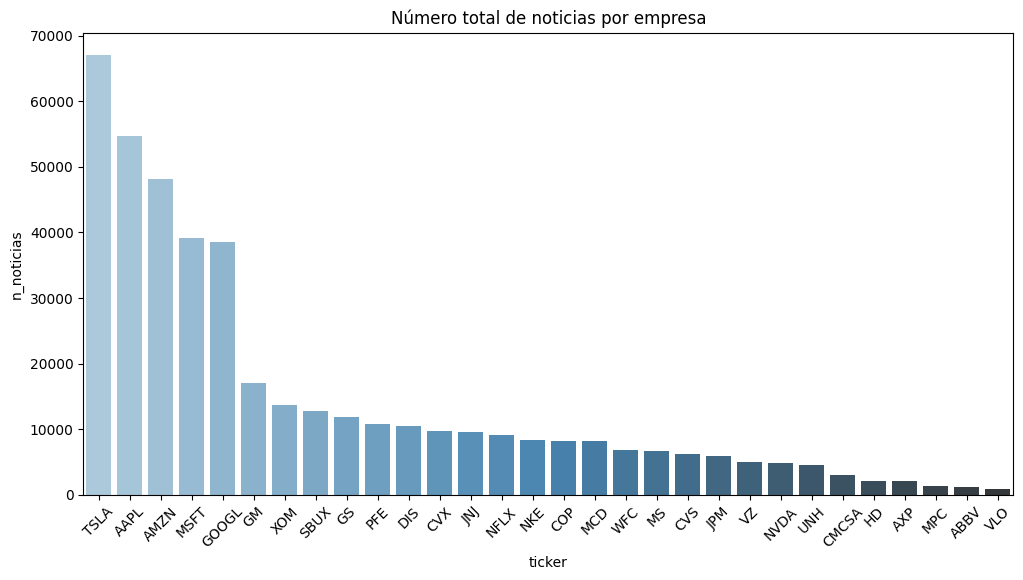

In [ ]:
news_count = news_press['ticker'].value_counts().reset_index()
news_count.columns = ['ticker', 'n_noticias']

plt.figure(figsize=(12,6))
sns.barplot(data=news_count, x='ticker', y='n_noticias', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Número total de noticias por empresa')
plt.show()

## News Distribution by ESG Category and Company

We study how news articles are distributed across the three ESG categories (Environmental, Social, Governance) for each company.
This helps us understand the focus areas of different firms.

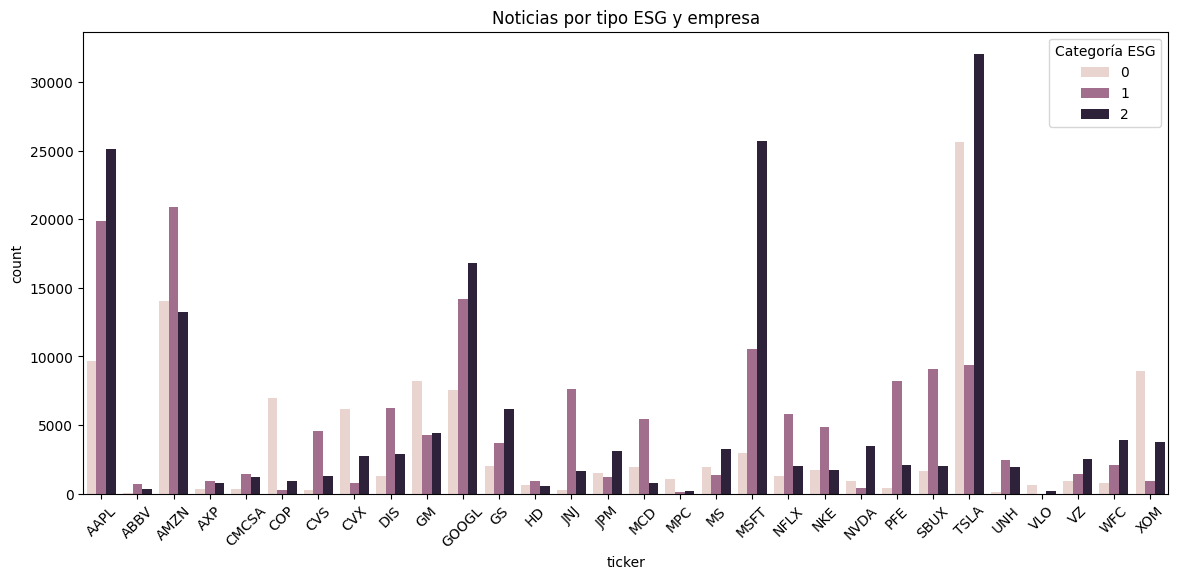

In [ ]:
df_grouped = news_press.groupby(['ticker', 'category']).size().reset_index(name='count')

plt.figure(figsize=(14,6))
sns.barplot(data=df_grouped, x='ticker', y='count', hue='category')
plt.title('Noticias por tipo ESG y empresa')
plt.xticks(rotation=45)
plt.legend(title='Categoría ESG')
plt.show()

## Sentiment Distribution across Companies

We visualize the sentiment distribution (positive, neutral, negative) for each company, aiming to capture the emotional tone of the news articles.

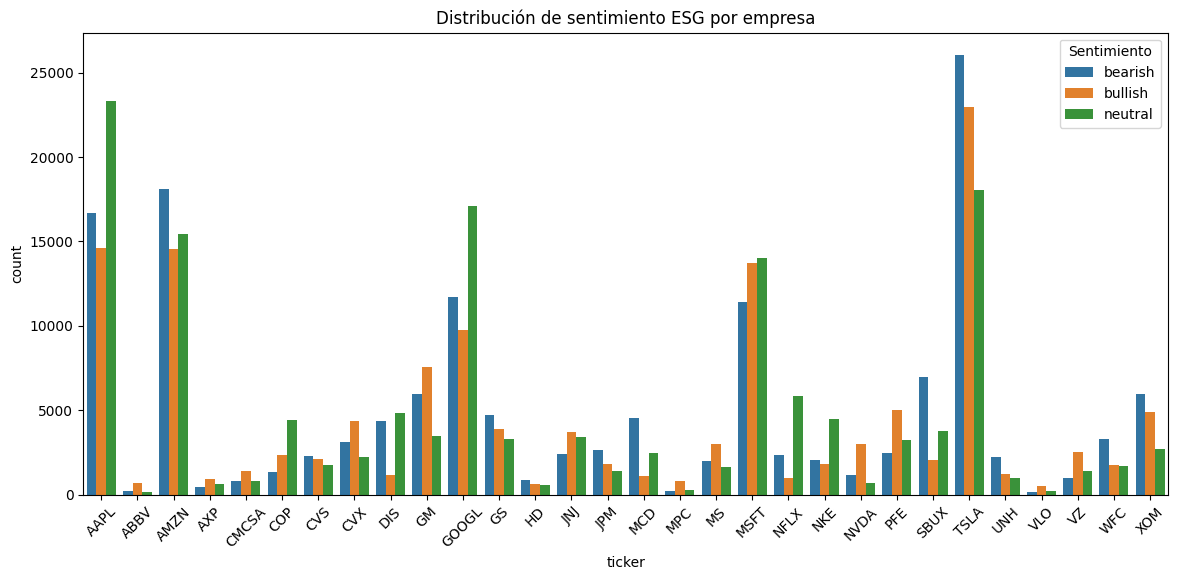

In [ ]:
sent_dist = news_press.groupby(['ticker', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(14,6))
sns.barplot(data=sent_dist, x='ticker', y='count', hue='sentiment')
plt.title('Distribución de sentimiento ESG por empresa')
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')
plt.show()

In [ ]:
news_press = news_press.rename(columns={'Publication Date': 'date'})

## Evolution of ESG News Over Time

We track the number of ESG-related news articles published over time, highlighting trends and potential event-driven spikes.

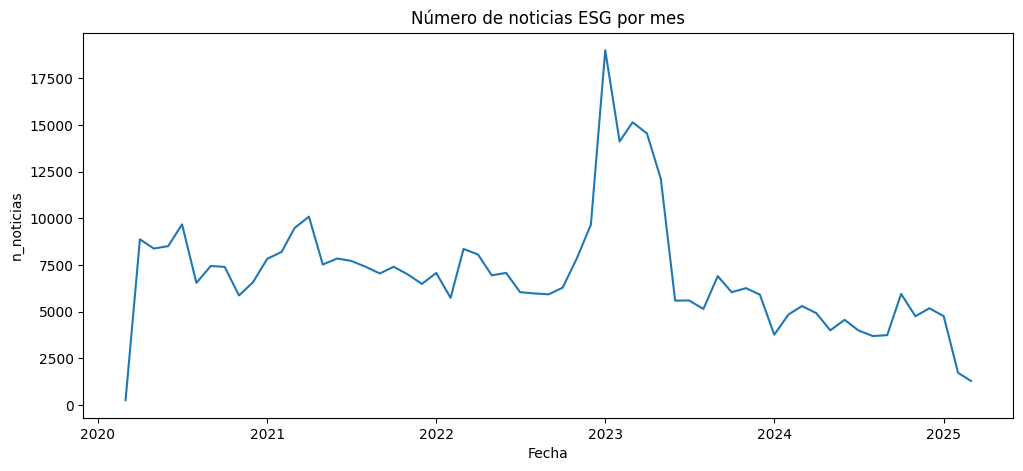

In [ ]:
news_press['date'] = pd.to_datetime(news_press['date'])
news_by_date = news_press.groupby(news_press['date'].dt.to_period('M')).size().reset_index(name='count')
news_by_date['date'] = news_by_date['date'].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data=news_by_date, x='date', y='count')
plt.title('Número de noticias ESG por mes')
plt.ylabel('n_noticias')
plt.xlabel('Fecha')
plt.show()

## Heatmap: Number of News by Company and ESG Category

A heatmap visualization shows the density of news articles across companies and ESG categories, helping us detect information gaps.

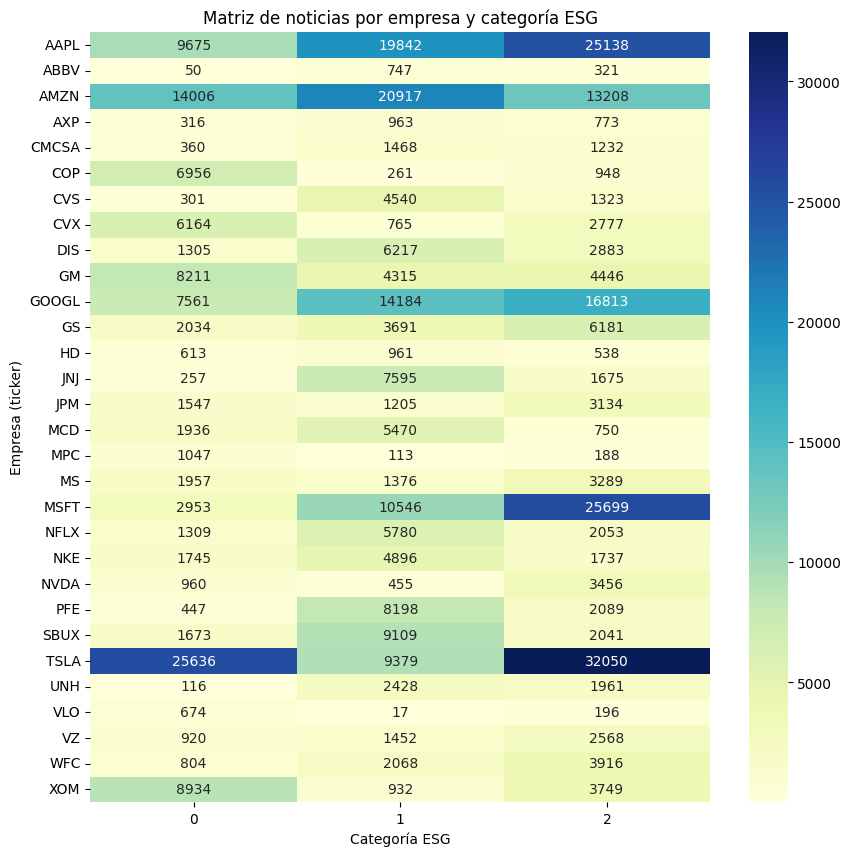

In [ ]:
heat = news_press.pivot_table(index='ticker', columns='category', values='content', aggfunc='count', fill_value=0)

plt.figure(figsize=(10,10))
sns.heatmap(heat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de noticias por empresa y categoría ESG')
plt.ylabel('Empresa (ticker)')
plt.xlabel('Categoría ESG')
plt.show()

In [ ]:
n_total = news_press.groupby("ticker").size().rename("n_total")

category_counts = (
    news_press.groupby(["ticker", "category"]).size()
    .unstack(fill_value=0)
)
category_props = category_counts.div(category_counts.sum(axis=1), axis=0)
category_props.columns = [f"pct_{col}" for col in category_props.columns]

sentiment_counts = (
    news_press.groupby(["ticker", "sentiment"]).size()
    .unstack(fill_value=0)
)
sentiment_props = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)
sentiment_props.columns = [f"pct_{col}" for col in sentiment_props.columns]

mean_rep = news_press.groupby("ticker")["reputation_score"].mean().rename("mean_reputation")

df_summary = pd.concat([n_total, category_props, sentiment_props, mean_rep], axis=1).reset_index()

In [ ]:
df_summary

,ticker,n_total,pct_0,pct_1,pct_2,pct_bearish,pct_bullish,pct_neutral,mean_reputation
0,AAPL,54655,0.177019,0.363041,0.459940,0.305279,0.267917,0.426805,0.975672
1,ABBV,1118,0.044723,0.668157,0.287120,0.211986,0.629696,0.158318,0.954442
2,AMZN,48131,0.290997,0.434585,0.274418,0.376763,0.302861,0.320376,0.953464
3,AXP,2052,0.153996,0.469298,0.376706,0.236842,0.458090,0.305068,0.903144
4,CMCSA,3060,0.117647,0.479739,0.402614,0.271895,0.457190,0.270915,0.925039
5,COP,8165,0.851929,0.031966,0.116105,0.167544,0.289528,0.542927,0.859376
6,CVS,6164,0.048832,0.736535,0.214633,0.371999,0.345717,0.282284,0.907844
7,CVX,9706,0.635071,0.078817,0.286112,0.322481,0.449310,0.228209,0.939635
8,DIS,10405,0.125420,0.597501,0.277078,0.420375,0.113599,0.466026,0.918438
9,GM,16972,0.483797,0.254242,0.261961,0.351461,0.444733,0.203806,0.954700


In [ ]:
features = df_summary.drop(columns=["ticker"]).copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_summary["cluster"] = kmeans.fit_predict(X_scaled)

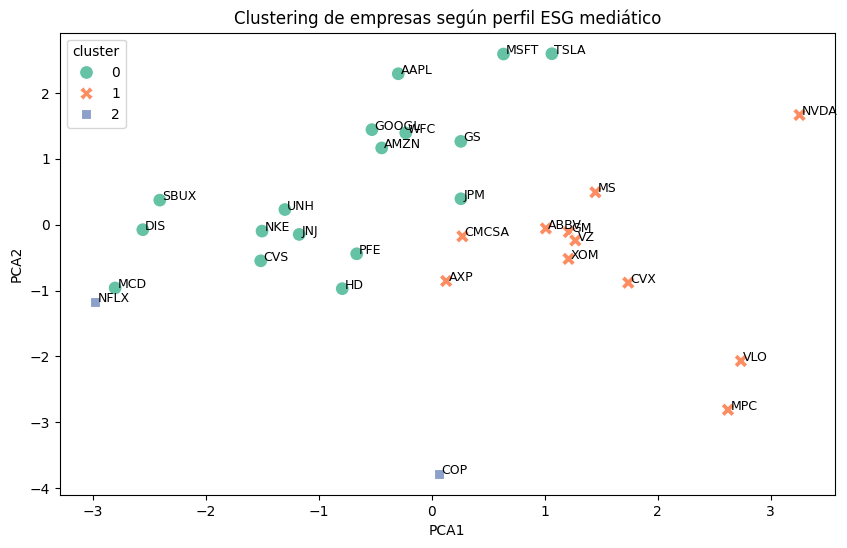

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_summary["PCA1"] = components[:, 0]
df_summary["PCA2"] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_summary, x="PCA1", y="PCA2", hue="cluster", style="cluster", palette="Set2", s=100)
for _, row in df_summary.iterrows():
    plt.text(row["PCA1"]+0.02, row["PCA2"], row["ticker"], fontsize=9)

plt.title("Clustering de empresas según perfil ESG mediático")
plt.show()

In [ ]:
df_summary.groupby("cluster")["ticker"].apply(list)

,ticker
cluster,
0,"[AAPL, AMZN, CVS, DIS, GOOGL, GS, HD, JNJ, JPM..."
1,"[ABBV, AXP, CMCSA, CVX, GM, MPC, MS, NVDA, VLO..."
2,"[COP, NFLX]"


In [ ]:
df_summary["cluster"] = kmeans.labels_

In [ ]:
df_summary.to_csv("/content/drive/MyDrive/MIAX/TRABAJO FINAL DE MASTER DEFINITIVO/DF_SUMMARY.csv", index=False)